In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PROPERTY_NAME = "drd2"

In [3]:
filepath_COMA = os.path.join('..', 'Tutorial_1_DRD2', f"outputs_1-4_{PROPERTY_NAME.upper()}_translation",  f"COMA_{PROPERTY_NAME.upper()}.csv")
filepath_TRIPLET = os.path.join('..', 'Tutorial_7_ANOTHER_METRIC_LOSS', f"outputs_7-2_{PROPERTY_NAME.upper()}_generation", f"TRIPLET_{PROPERTY_NAME.upper()}.csv")
filepath_CONTRASTIVE = os.path.join(f"outputs_8-2_{PROPERTY_NAME.upper()}_generation", f"CONTRASTIVE_{PROPERTY_NAME.upper()}.csv")

In [4]:
output_dir = f"outputs_8-3_{PROPERTY_NAME.upper()}_similarity_distribution"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [5]:
df_COMA = pd.read_csv(filepath_COMA, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_TRIPLET = pd.read_csv(filepath_TRIPLET, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_CONTRASTIVE = pd.read_csv(filepath_CONTRASTIVE, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})

In [6]:
df_COMA = df_COMA.groupby('SOURCE').max()
df_TRIPLET = df_TRIPLET.groupby('SOURCE').max()
df_CONTRASTIVE = df_CONTRASTIVE.groupby('SOURCE').max()

In [7]:
df_COMA = df_COMA[df_COMA['SIMILARITY'] > 0]
df_TRIPLET = df_TRIPLET[df_TRIPLET['SIMILARITY'] > 0]
df_CONTRASTIVE = df_CONTRASTIVE[df_CONTRASTIVE['SIMILARITY'] > 0]

In [8]:
df_COMA.loc[:,'MODEL'] = 'COMA'
df_TRIPLET.loc[:,'MODEL'] = 'TRIPLET'
df_CONTRASTIVE.loc[:,'MODEL'] = 'CONTRASTIVE'
df_merged = pd.concat((df_COMA, df_TRIPLET, df_CONTRASTIVE), ignore_index=True)

In [9]:
df_merged

,TARGET,SIMILARITY,PROPERTY,MODEL
0,COC1CCN(CCCCC2=CNC3=CC=CC=C23)CC1,0.155172,1.000000,COMA
1,C#CCN1CCN(CCCCNC(=O)NCCCCN2CCN(C3=CC=CC=C3)CC2...,0.380952,0.585273,COMA
2,COC(=O)NCCCCN1CCN(C2=CC=C(Cl)C=C2)CC1,0.323077,0.843600,COMA
3,COCCN1CCN(CCCCCN2CCN(C3=CC=CC(Cl)=C3)CC2)CC1,0.369231,0.885185,COMA
4,CCN(CC)CC1=CC=C(C(=O)NCCCCN2CCC(C3=CC=C(Cl)C=C...,0.287671,0.993340,COMA
...,...,...,...,...
2995,OC1=C2C=CC=CC2=C(N2CCN(CC=CC3=CC=CC=C3)CC2)O1,0.179104,0.999999,CONTRASTIVE
2996,O=C1OC(C2=CC=C3CCCCC3=NC2=C1)N1CC=C(C2=CNC3=CC...,0.188406,0.985475,CONTRASTIVE
2997,OC1=NC2=CC=CC=C2N1C1CCN(CC2=CSC3=CC=CC=C23)CC1,0.194030,0.999998,CONTRASTIVE
2998,O=[N+]([O-])C1=CC=C(OCCNCCCOC2=CC=CC=C2)C=C1,0.202532,0.999998,CONTRASTIVE


In [10]:
df_merged.groupby('MODEL').mean()

,SIMILARITY,PROPERTY
MODEL,,
COMA,0.422689,0.978621
CONTRASTIVE,0.261695,0.989856
TRIPLET,0.269247,0.990497


In [13]:
model2label = {'COMA':'contrative & margin (0.423)',
               'TRIPLET':'triplet loss (0.269)',
               'CONTRASTIVE':'contrastive loss (0.262)'}

df_merged.loc[:,'LABEL'] = df_merged.loc[:,'MODEL'].map(lambda x:model2label.get(x))

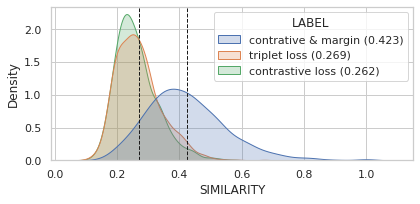

In [15]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(1,1,figsize=(6,3))

ax = sns.kdeplot(data=df_merged, x='SIMILARITY', hue='LABEL', legend=True, fill=True, ax=ax)

ax.axvline(x=0.423, c='k', linewidth=1., linestyle='--', label=None)
ax.axvline(x=0.269, c='k', linewidth=1., linestyle='--', label=None)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'kde_plots.png'), dpi=300)
plt.show()